In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("df_usa.csv")
df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,States
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,stinson,108-3,No,1.0,reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,ID
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,piper,PA24-180,No,1.0,reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,CA
2,1974-08-30,"SALTVILLE, VA",United States,Fatal(3),Destroyed,NaN,cessna,172M,No,1.0,reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,VA
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,rockwell,112,No,1.0,reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,CA
4,1979-08-02,"CANTON, OH",United States,Fatal(1),Destroyed,NaN,cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,OH


<AxesSubplot:>

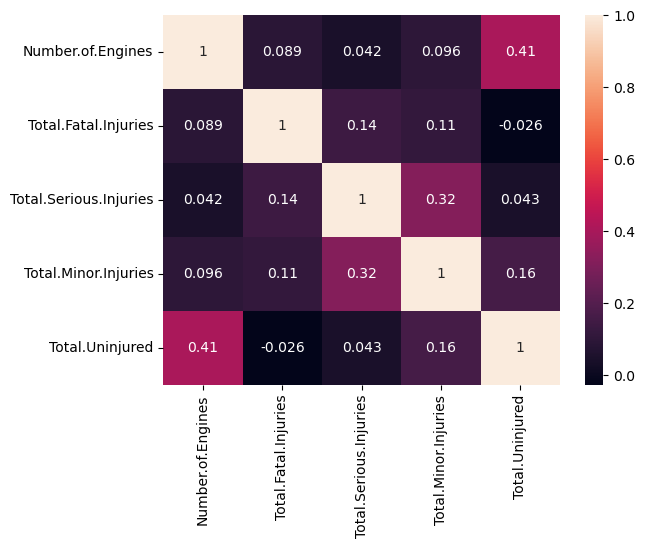

In [3]:
sns.heatmap(df.corr(), annot=True)

In [18]:
df = df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3556 entries, 7 to 61351
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              3556 non-null   object 
 1   Location                3556 non-null   object 
 2   Country                 3556 non-null   object 
 3   Injury.Severity         3556 non-null   object 
 4   Aircraft.damage         3556 non-null   object 
 5   Aircraft.Category       3556 non-null   object 
 6   Make                    3556 non-null   object 
 7   Model                   3556 non-null   object 
 8   Amateur.Built           3556 non-null   object 
 9   Number.of.Engines       3556 non-null   float64
 10  Engine.Type             3556 non-null   object 
 11  Purpose.of.flight       3556 non-null   object 
 12  Total.Fatal.Injuries    3556 non-null   float64
 13  Total.Serious.Injuries  3556 non-null   float64
 14  Total.Minor.Injuries    3556 non-null  

In [21]:
# usunięcie niepotrzebnych kolumn
df1 = df.drop(['Event.Date', 'Location', 'Country','Make', 'Model', 'Aircraft.Category','Injury.Severity', 'Report.Status'], axis=1)
df1.head()

,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,States
7,Substantial,No,1.0,reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,WA
8,Substantial,No,2.0,reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,NJ
12,Destroyed,No,1.0,reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,LA
13,Destroyed,No,1.0,reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,TX
14,Destroyed,No,1.0,reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Cruise,OK


In [22]:
df_encoded = pd.get_dummies(df1)

In [23]:
df_encoded.head()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage_Destroyed,Aircraft.damage_Minor,Aircraft.damage_Substantial,Amateur.Built_No,Amateur.Built_Yes,...,States_SD,States_TN,States_TX,States_UT,States_VA,States_VT,States_WA,States_WI,States_WV,States_WY
7,1.0,0.0,0.0,0.0,2.0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
8,2.0,0.0,0.0,0.0,2.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
12,1.0,0.0,0.0,1.0,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,1.0,1.0,0.0,0.0,0.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
14,1.0,1.0,0.0,0.0,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_encoded.corr()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage_Destroyed,Aircraft.damage_Minor,Aircraft.damage_Substantial,Amateur.Built_No,Amateur.Built_Yes,...,States_SD,States_TN,States_TX,States_UT,States_VA,States_VT,States_WA,States_WI,States_WV,States_WY
Number.of.Engines,1.000000,0.100617,0.006880,0.084326,0.285158,0.016740,0.212380,-0.098924,0.074976,-0.074976,...,-0.022305,0.019364,0.029101,0.001895,-0.008302,-0.003769,-0.047594,0.000081,-0.011818,-0.004994
Total.Fatal.Injuries,0.100617,1.000000,0.082971,0.020592,-0.047091,0.472381,-0.064413,-0.433017,-0.024396,0.024396,...,0.006680,0.005050,0.019327,0.026730,0.037754,-0.014408,-0.009148,-0.007254,0.019510,-0.008909
Total.Serious.Injuries,0.006880,0.082971,1.000000,0.169354,0.038044,0.199566,-0.017744,-0.186622,-0.016243,0.016243,...,-0.003547,0.006528,-0.025032,-0.002943,-0.000618,-0.016330,-0.005092,-0.020402,-0.021313,0.046902
Total.Minor.Injuries,0.084326,0.020592,0.169354,1.000000,0.220877,0.009104,0.044258,-0.026060,0.025530,-0.025530,...,-0.018022,0.005245,-0.011969,-0.000179,-0.000614,-0.013418,-0.001725,-0.001738,-0.010005,0.040875
Total.Uninjured,0.285158,-0.047091,0.038044,0.220877,1.000000,-0.085951,0.252291,-0.014877,0.033520,-0.033520,...,-0.002464,0.007973,-0.008203,-0.010973,-0.009923,-0.003122,-0.010649,-0.006252,-0.003339,0.031418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
States_VT,-0.003769,-0.014408,-0.016330,-0.013418,-0.003122,-0.022521,-0.010052,0.025754,-0.007250,0.007250,...,-0.003788,-0.005140,-0.016178,-0.005944,-0.005735,1.000000,-0.008798,-0.006594,-0.003681,-0.006012
States_WA,-0.047594,-0.009148,-0.005092,-0.001725,-0.010649,0.012118,-0.021816,-0.003257,-0.033147,0.033147,...,-0.011817,-0.016035,-0.050473,-0.018544,-0.017893,-0.008798,1.000000,-0.020573,-0.011483,-0.018757
States_WI,0.000081,-0.007254,-0.020402,-0.001738,-0.006252,0.000892,0.001663,-0.001513,-0.041018,0.041018,...,-0.008857,-0.012018,-0.037830,-0.013899,-0.013411,-0.006594,-0.020573,1.000000,-0.008606,-0.014058
States_WV,-0.011818,0.019510,-0.021313,-0.010005,-0.003339,-0.008791,0.031502,-0.003740,0.018437,-0.018437,...,-0.004944,-0.006708,-0.021114,-0.007758,-0.007485,-0.003681,-0.011483,-0.008606,1.000000,-0.007846


In [25]:
import pandas_profiling as pp
profile = pp.ProfileReport(df_encoded)
profile.to_file("df_encoded.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

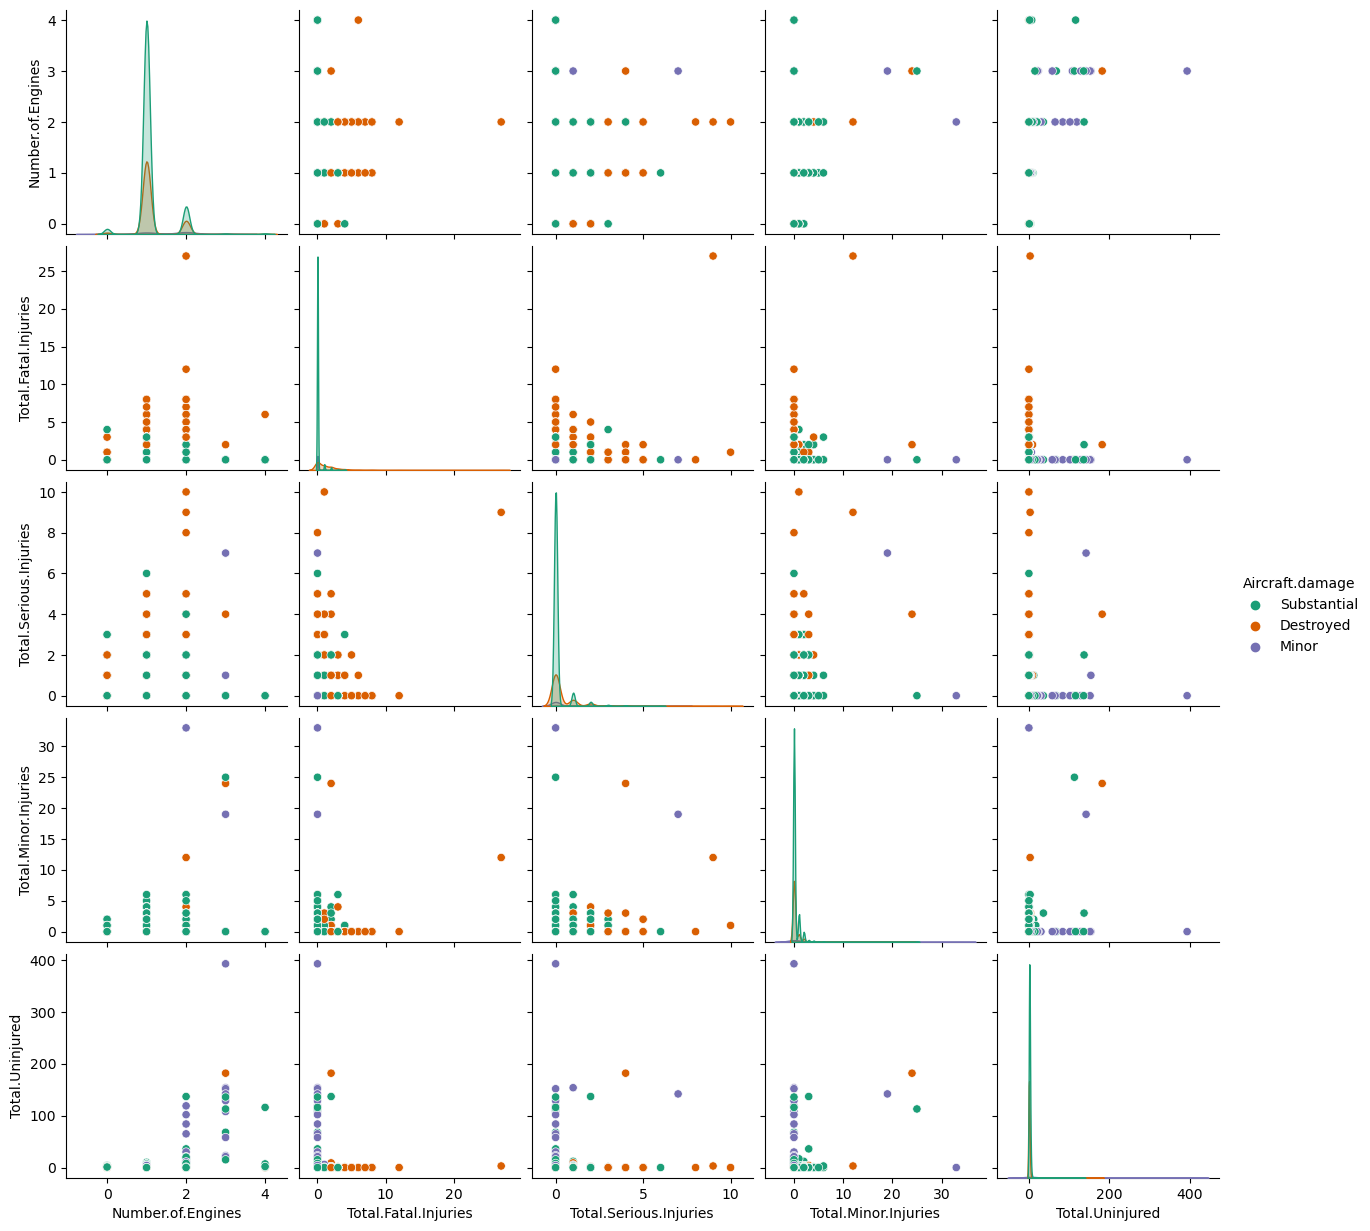

In [20]:
sns.pairplot(df,hue='Aircraft.damage',palette='Dark2')

In [ ]:
pd.get_dummies(df)